In [1]:
import os
import spacy
import cv2
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import matplotlib.pylab as plt
import pandas as pd
# from torchtext import data
from torch.utils.data import DataLoader, Dataset

# Image-Captioning
Image Captioning project - find best description for a given image

## The Dataset
We use the Flickr30k Dataset which consists of 30k images and a csv with a few captions - descriptions for each image.
You can find the dataset here https://www.kaggle.com/hsankesara/flickr-image-dataset
or type the following command in the command line to use Kaggle's API 
kaggle datasets download -d hsankesara/flickr-image-dataset


In [2]:
BASE_DIR = "data"
IMAGES_DIR = "flickr30k_images"
CAPTIONS_DIR = "labels"
CAPTIONS_FILE = "results.csv"

In [3]:
nlp = spacy.load("en")

In [4]:
convert_str_idx = {'<PAD>':0, '<UNK':2, '<SOS>':3, '<EOS':4}

In [5]:
convert_idx_str = {v:k for k,v in convert_str_idx.items()}

In [6]:
convert_idx_str

{0: '<PAD>', 2: '<UNK', 3: '<SOS>', 4: '<EOS'}

In [7]:
df = pd.read_csv(os.path.join(BASE_DIR, CAPTIONS_DIR, CAPTIONS_FILE), delimiter='|')

In [8]:
df

,image_name,comment_number,comment
0,1000092795.jpg,0,Two young guys with shaggy hair look at their...
1,1000092795.jpg,1,"Two young , White males are outside near many..."
2,1000092795.jpg,2,Two men in green shirts are standing in a yard .
3,1000092795.jpg,3,A man in a blue shirt standing in a garden .
4,1000092795.jpg,4,Two friends enjoy time spent together .
...,...,...,...
158910,998845445.jpg,0,A man in shorts and a Hawaiian shirt leans ov...
158911,998845445.jpg,1,"A young man hanging over the side of a boat ,..."
158912,998845445.jpg,2,A man is leaning off of the side of a blue an...
158913,998845445.jpg,3,"A man riding a small boat in a harbor , with ..."


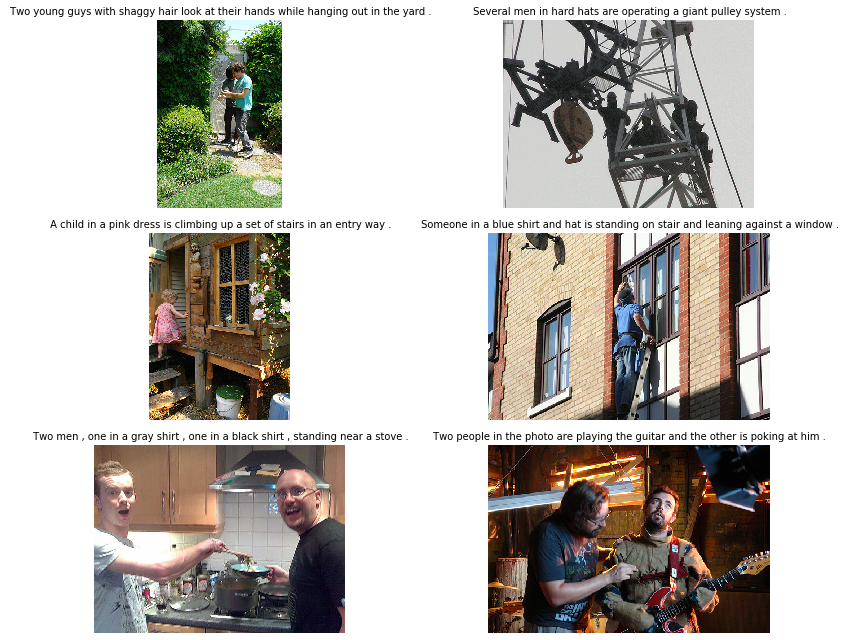

In [9]:
examples = df[df[' comment_number']==' 0'].reset_index().loc[0:5,['image_name', ' comment']]
fig = plt.figure(figsize=(12, 9))
for i,(example_img, example_caption) in examples.iterrows():
    img = cv2.imread(os.path.join(BASE_DIR, IMAGES_DIR, example_img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
    ax = fig.add_subplot(3, 2, i+1)
    ax.imshow(img)
    ax.set_title(example_caption, size=10)
    ax.set_axis_off()
plt.tight_layout()
plt.show()